# **Lab: Exploratory Data Analysis**
In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 

## Objectives
In this lab, you will perform the following:
- Examine the structure of a dataset.
- Handle missing values effectively.
- Conduct summary statistics on key columns.
- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.

## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
df[critical_cols].isnull().sum()

total_rows = len(df)

for col in critical_cols:
    missing = df[col].isnull().sum()
    percent = (missing / total_rows) * 100
    print(f"{col}: {missing} missing values ({percent:.2f}%)")

for col in critical_cols:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

df[critical_cols].isnull().sum()

Employment: 0 missing values (0.00%)
JobSat: 36311 missing values (55.49%)
RemoteWork: 10631 missing values (16.25%)


C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_27912\3969409179.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


Employment    0
JobSat        0
RemoteWork    0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_27912\1682003343.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_27912\1682003343.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat', palette='coolwarm')


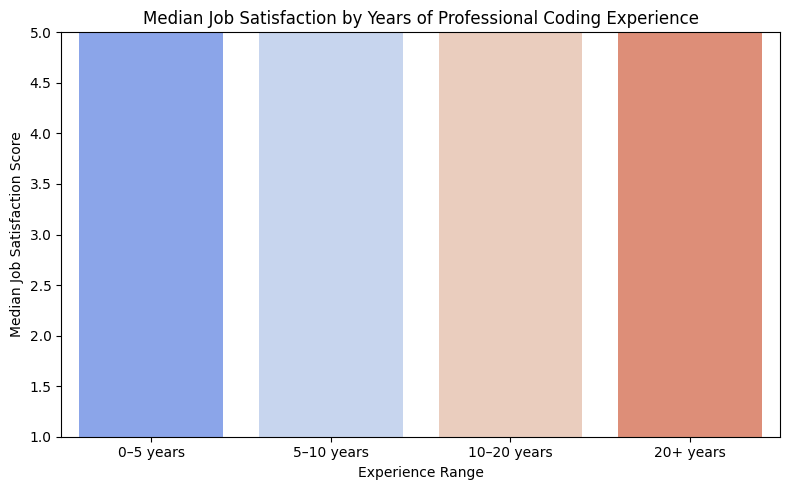

In [4]:
## Write your code here
# print(df['JobSat'].value_counts())

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 5, 10, 20, float('inf')]
labels = ['0–5 years', '5–10 years', '10–20 years', '20+ years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
# print(median_satisfaction)

plt.figure(figsize=(8, 5))
sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat', palette='coolwarm')

plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction Score')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_27912\1939106337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Blues')


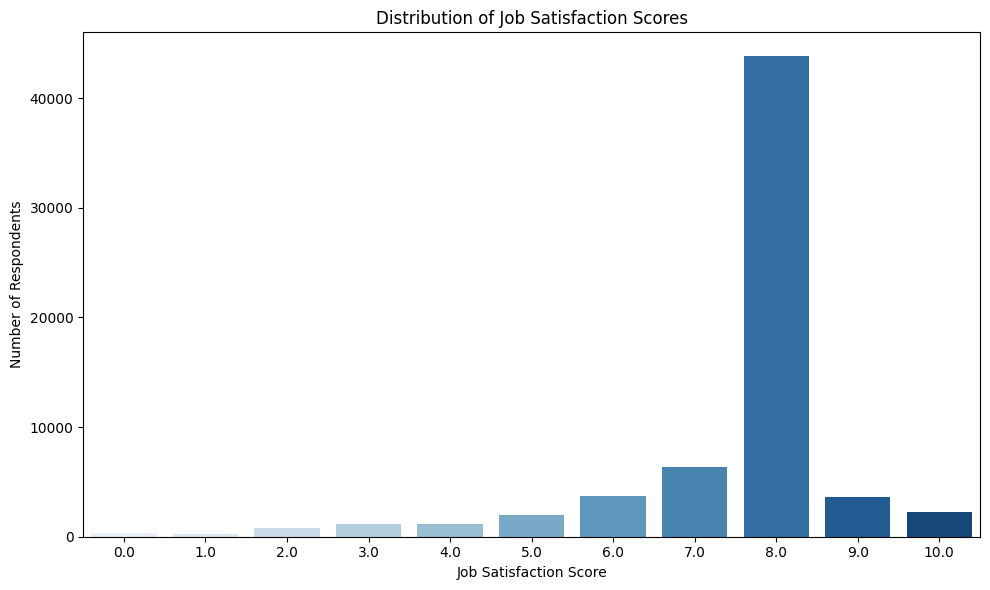

In [5]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', palette='Blues')

plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_27912\2055214450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')


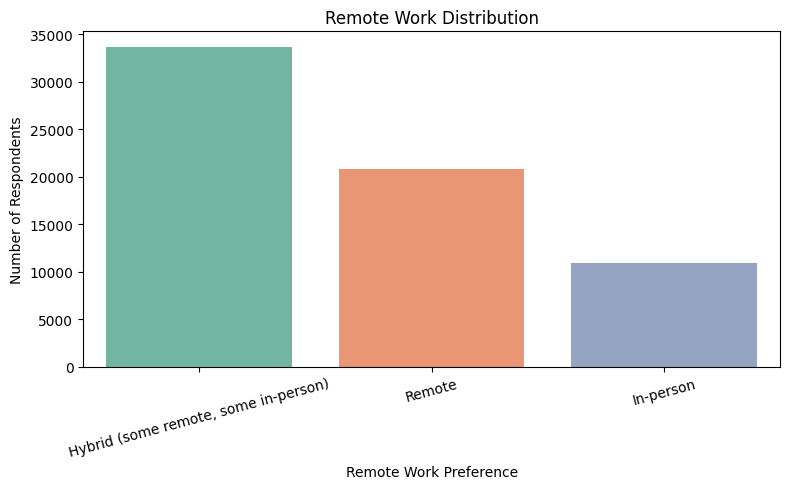

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 44.3   
Employed, full-time;Employed, part-time                                             40.1   
Employed, full-time;Independent contractor, fre...                                  37.4   
Employed, full-time;Independent contractor, fre...                                  43.5   
Employed, full-time;Independent contractor, fre...                                   0.0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                  57.1   
Student, full-time;Student, part-time;Retired                                      100.0   
Student, part-time                                                              

In [6]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')

plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

remote_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print(remote_employment_ct.round(1))

remote_job_ct = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100
print(remote_job_ct.round(1))

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


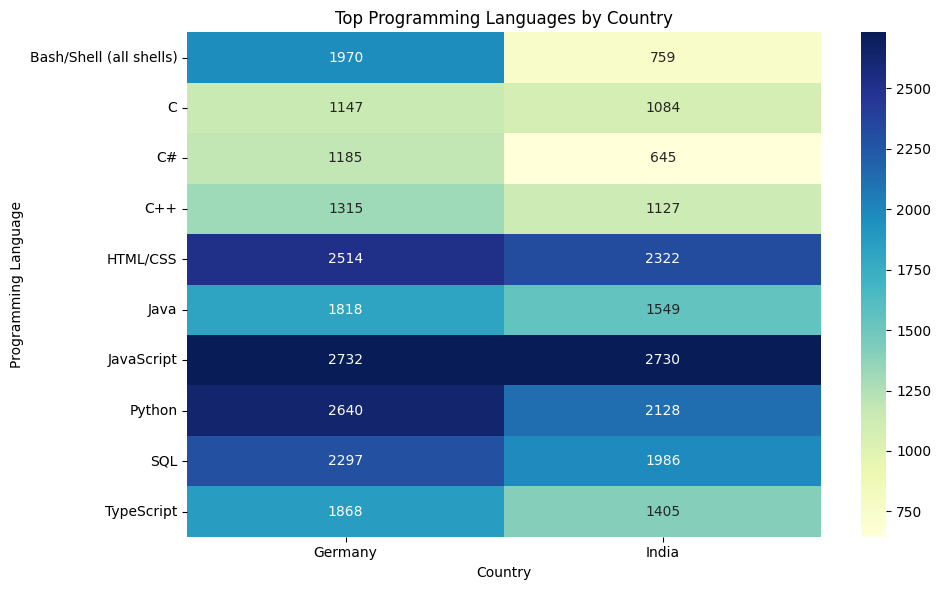

In [7]:
## Write your code here
# Choose a few countries to compare
selected_countries = ['United States', 'India', 'Germany']
df_filtered = df[df['Country'].isin(selected_countries)][['Country', 'LanguageHaveWorkedWith']]

# Drop rows with missing language data
df_filtered = df_filtered.dropna(subset=['LanguageHaveWorkedWith'])

# Split LanguageHaveWorkedWith into separate rows
df_exploded = df_filtered.assign(
    Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Remove extra whitespace
df_exploded['Language'] = df_exploded['Language'].str.strip()

# Count languages per country
language_counts = df_exploded.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Create a pivot table (rows=Language, columns=Country)
heatmap_data = language_counts.pivot(index='Language', columns='Country', values='Count').fillna(0)

# Filter for top 10 languages overall
top_languages = df_exploded['Language'].value_counts().head(10).index
heatmap_top = heatmap_data.loc[heatmap_data.index.isin(top_languages)]

# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_top, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Top Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


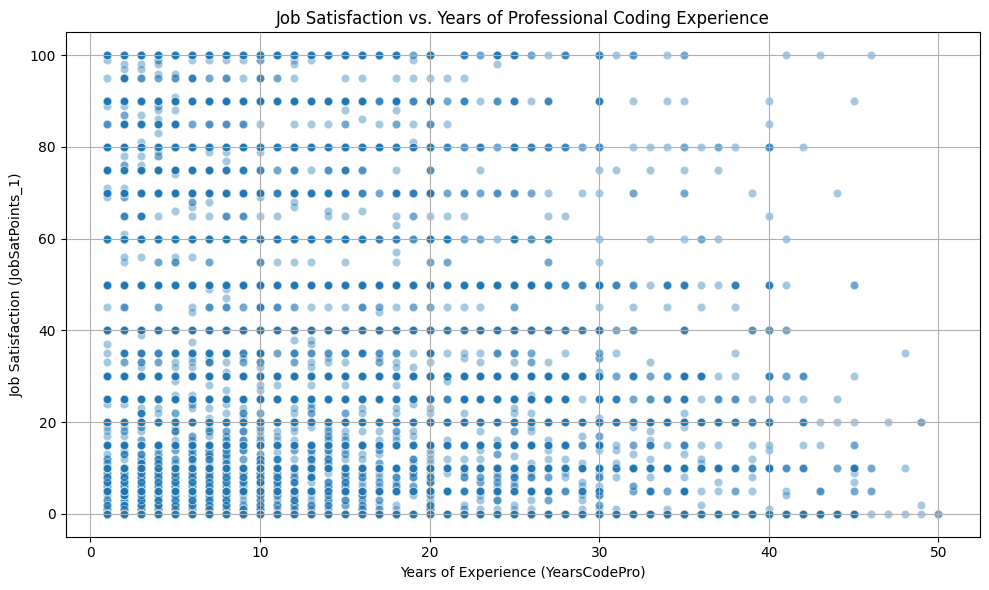

In [8]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df_scatter = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='YearsCodePro', y='JobSatPoints_1', alpha=0.4)

plt.title('Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Experience (YearsCodePro)')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                59.1   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       67.4   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    70.8   
Primary/elementary school                                          14.0   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     69.8   
Secondary school (e.g. American high school, Ge...                 25.2   
Some college/university study without earning a...                 46.8   
Something else                                                     40.5   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_27912\674535791.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


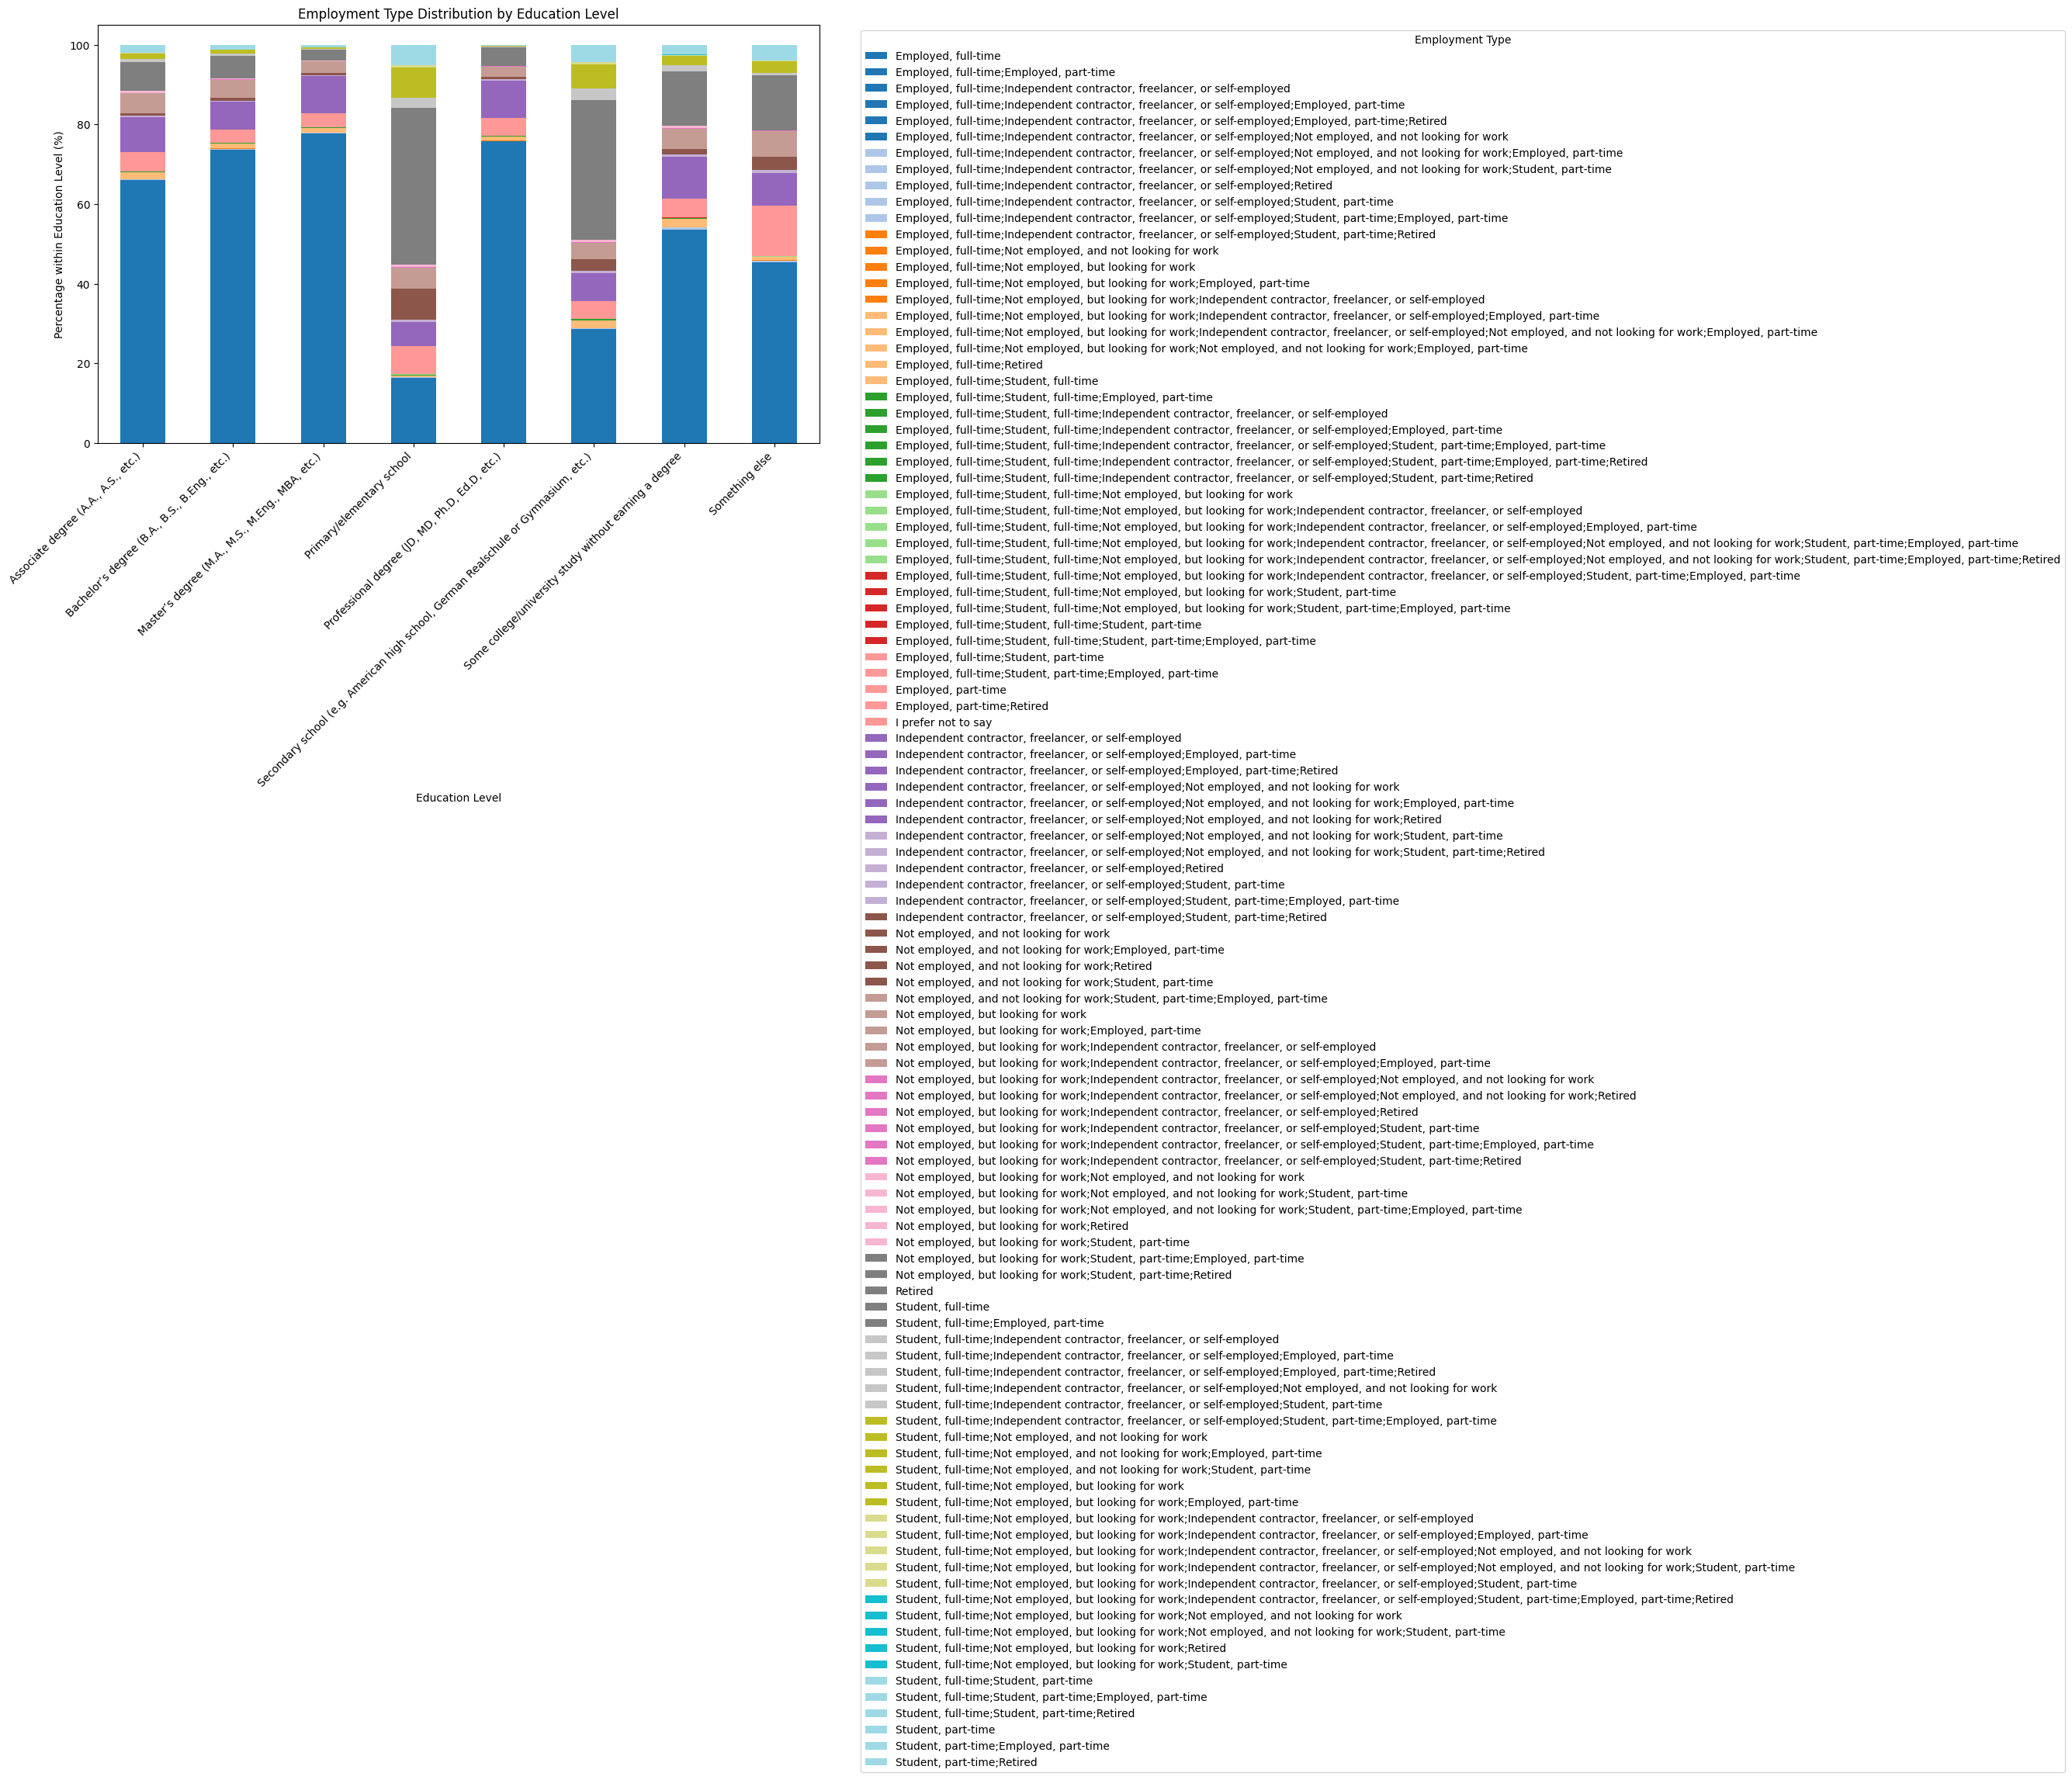

In [9]:
## Write your code here
# Cross-tabulate counts
education_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100

# Display the cross-tabulation (percentage of employment types within each education level)
print(education_employment_ct.round(1))

education_employment_ct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage within Education Level (%)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [10]:
## Write your code here
# Save to CSV file
df.to_csv('modified_survey_data.csv', index=False)

## Summary
In this revised lab, you:
- Loaded and explored the structure of the dataset.
- Handled missing data effectively.
- Analyzed key variables, including working hours, job satisfaction, and remote work trends.
- Investigated programming language usage by region and examined the relationship between experience and satisfaction.
- Used cross-tabulation to understand educational background and employment type.

Copyright © IBM Corporation. All rights reserved.
